# Séries de Fourier

<hr/>
Aluno: Alejo Perdomo Milar
<br/>
Curso: Engenharia Eletronica 2023.1
<br/>
Sinais e Sistemas
<hr/>

# Sobre o código

O código completo pode ser encontrado no link:
[]()
Recomenda-se que se clone / baixe o repositório acima na sua máquina para execução deste, bem como que se instale previamente python e as bibliotecas requeridas numpy, control, matplotlib, scipy. Caso esses passos não sejam atendidos, podem ocorrer erros durante a execução bem como um comportamento não esperado do código.

# Introdução

Este trabalho tem como objetivo realizar a decomposição de dois sinais utilizando a série de Fourier e desenvolver um código capaz de visualizar o sinal original e sua reconstrução com base nos coeficientes da série. Além disso, o código permitirá ao usuário especificar a quantidade de coeficientes utilizados na série e apresentará os gráficos de magnitude e fase da série para ambos os sinais. Será investigada a influência da simetria do sinal nos coeficientes da série, a relação entre o período fundamental e a distribuição das componentes de frequência, e será examinado o erro resultante da aproximação por Série de Fourier devido às descontinuidades do sinal.

# Objetivos

Requisitos do trabalho:
* Dado 2 sinais, deve-se realizar a decomposição desses sinais utilizando a série de Fourier
* Com as séries obitidas deve-se fazer um código capaz de:
  * Visualizar o sinal original bem como a sua versão reconstruida a partir dos coeficientes da série
  * Permitir que o usuário especifique a quantidade de coeficientes utilizado na série
  * Apresentar o gráfico de magnitude e fase da série para ambos os sinais

Objetivos:
* Observar a conexão entre o período fundamental e a distribuição das componentes no eixo de frequência;
* Examinar o erro resultante da aproximação por Série de Fourier devido às descontinuidades do sinal.

Sistemas escolhidos com base no PDF de requisítos do trabalho:

## Primeira função

**Figura P6.1-3**

<img src="assets/f1.png">

$$
f_{saw}(x) = 
  \sum_{k = -\infty}^{\infty} 
    1 * 
      (u(t - (k*10\pi - \pi)) - 
      u(t - (k*10\pi + \pi)))
$$

## Segunda função

**Figura P6.1-5(a)**

<img src="assets/f2.png">

**Usando pulsos**

$$
f_{saw}(x) = 
  \sum_{k = -\infty}^{\infty} 
    (x - 8k) * 
      (u(t - 8k) - 
      u(t - (8k + 2))) -
    (x - 8k) * 
      (u(t - (8k + 4)) - 
      u(t - (8k + 6)))       
$$
**Usando multipla sentença**
$$
\text{ou} \\
f_{saw}(x) = 
  \begin{cases}
    \text{x, } & \quad \text{if }  0 <= x <= 2 \\
    \text{-x,} & \quad \text{ if }  4 <= x <= 6 \\
    \text{0, } & \quad \text{ otherwise}
  \end{cases}
$$



# Bibliotecas utilizadas no código

In [116]:
# Packages install
%pip install -q numpy control matplotlib scipy sympy

Note: you may need to restart the kernel to use updated packages.


In [117]:
# Análise numérica
import numpy as np
# Análise analitica
import sympy as sym
# Plots
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
# Tipagem
from typing import List, Tuple
# Desabilitar warnings (somente para exportação)
import warnings
warnings.filterwarnings('ignore')

# Verificando a função 1

**Figura P6.1-3**

<img src="assets/f1.png">

A função tem um periodo de $10\pi$ e em esse periodo é descrita por $1$, para representar essa função é utilizado uma função base $1$ multiplicada por dois degraus unitarios para definir o periodo

$$
f_{saw}(x) = 
  \sum_{k = -\infty}^{\infty} 
    1 * 
      (u(t - (k*10\pi - \pi)) - 
      u(t - (k*10\pi + \pi)))
$$


## Descrição em codigo da função

In [118]:
def f_aux(x, k):
    return 1 * (np.heaviside(x - (k * (10 * np.pi) - (np.pi)), 1)) - np.heaviside(x - (k * (10 * np.pi) + (np.pi)), 1)

def f(x):
    return [np.sum([ f_aux(d, k) for k in range(int(x.min() / (10 * np.pi)) - 2, int(x.max() / (10 * np.pi)) + 2) ]) for d in x ]

## Desenho do grafico da função

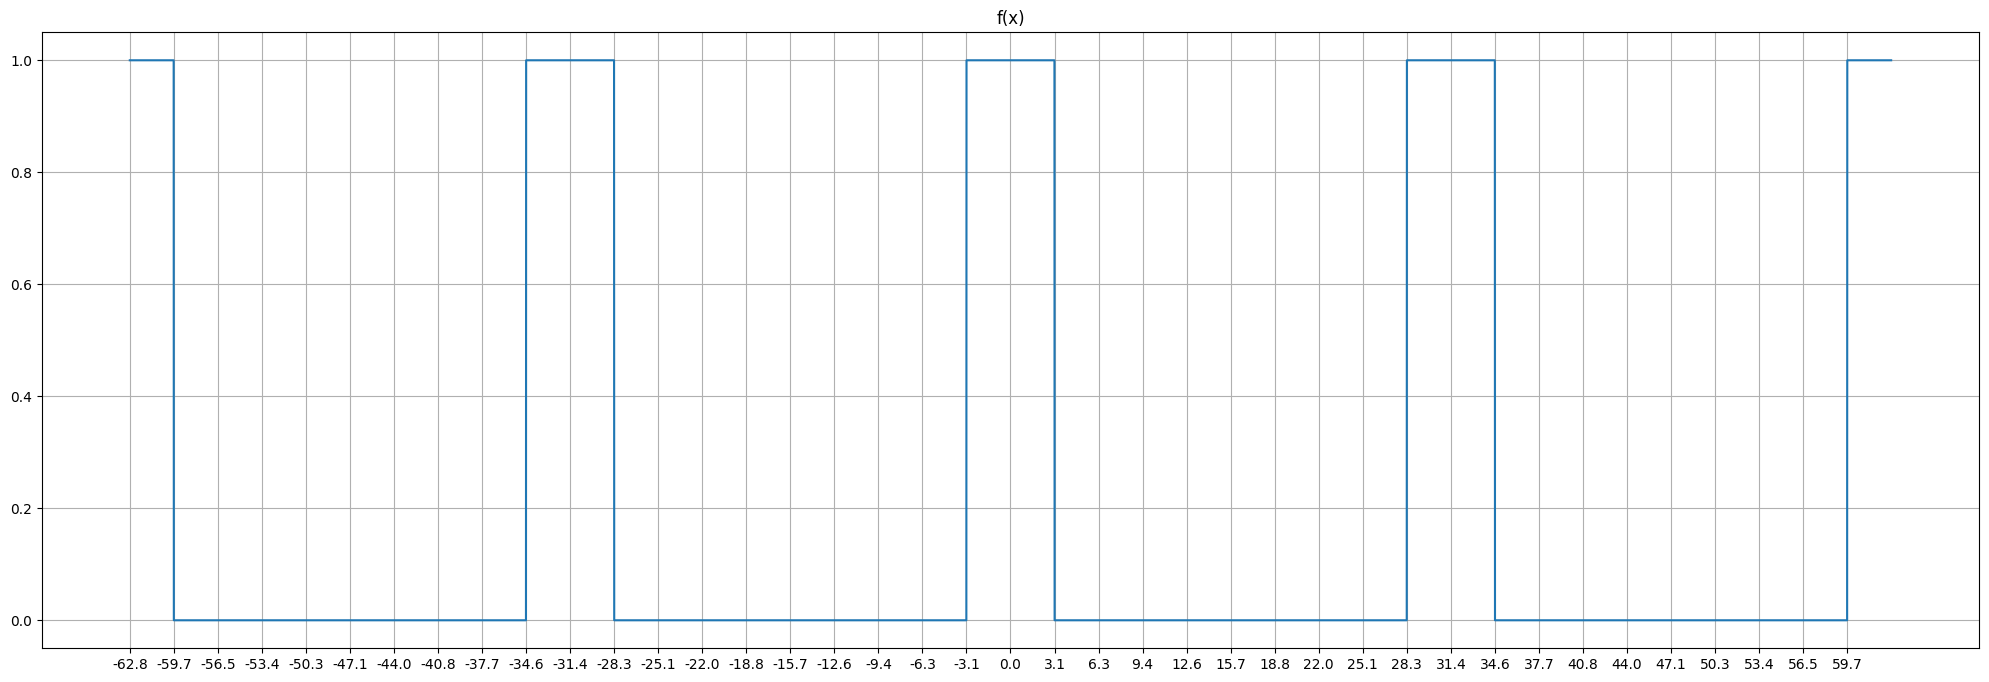

In [119]:
x = np.linspace(2 * -10 * np.pi, 2 * 10 * np.pi, 10000)
y = f(x)

fig = plt.figure(figsize = (25, 8))
ax = fig.add_subplot()
ax.grid()
ax.plot(x, y)


# Configurando o grafico

ax.set_title(f'f(x)')
ax.set_xticks(np.arange(x.min(), x.max(), np.pi))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.grid(visible=True)


## Calculando os coeficientes da serie de fourier (Item 1)

Os coeficientes da serie de fourier podem ser calculados por:

$$ck(k) = \frac{1}{T_0} \int_{T_0} f(x)e^{-j w_0 t}dt$$

Substituindo a função na integral

$$ck(k) = \frac{1}{T_0} \int_{T_0} 1 e^{-j w_0 t}dt$$

Como a função tem partes, ela pode ser desrita pelo somatorio das integrais

$$
ck(k) = \frac{1}{T_0} \int_{0}^{\pi} 1 e^{-j w_0 t}dt +
\frac{1}{T_0} \int_{\pi}^{9\pi} 0 * e^{-j w_0 t}dt +
\frac{1}{T_0} \int_{9\pi}^{10\pi} 1 e^{-j w_0 t}dt
$$

Resolvendo a integral:

$$\begin{cases} \frac{i \left(e^{\frac{19 i \pi k}{5}} - e^{\frac{11 i \pi k}{5}} - e^{4 i \pi k} + e^{2 i \pi k}\right) e^{- 4 i \pi k}}{2 \pi k} & \text{for}\: \left(k > -\infty \vee k > 0\right) \wedge \left(k > -\infty \vee k < \infty\right) \wedge \left(k > 0 \vee k < 0\right) \wedge \left(k < 0 \vee k < \infty\right) \\\frac{1}{5} & \text{otherwise} \end{cases}$$

In [120]:
# Periodo
t_0 = 10 * sym.pi
# Frequencia
f_0 = 1 / t_0
# Frequencia angular
w_0 = 2 * sym.pi * f_0

# Definindo a variavel independente
t = sym.Symbol('t')
# Definindo o periodo
k = sym.Symbol('k')

# Calculando a equação que define os coeficientes da serie de fourier para a função
ck = f_0 * sym.integrate(1 * sym.exp(-sym.I * k * w_0 * t), (t, 0, sym.pi)) + \
    f_0 * sym.integrate(0 * sym.exp(-sym.I * k * w_0 * t), (t, sym.pi , 9 * sym.pi)) + \
    f_0 * sym.integrate(1 * sym.exp(-sym.I * k * w_0 * t), (t, 9 * sym.pi , 10 * sym.pi))

print("Coeficientes da serie de fourier:")
display(sym.simplify(ck))

Coeficientes da serie de fourier:


Piecewise((I*(exp(19*I*pi*k/5) - exp(11*I*pi*k/5) - exp(4*I*pi*k) + exp(2*I*pi*k))*exp(-4*I*pi*k)/(2*pi*k), ((k > -oo) | (k > 0)) & ((k > -oo) | (k < oo)) & ((k > 0) | (k < 0)) & ((k < 0) | (k < oo))), (1/5, True))

## Recriando o sinal a partir da serie de fourier (item 2)

### Calculo

Para recriar a função são criadas ks_len harmonicas para cada t usando a função

$$ 
f_{new}(t) =
\sum_{k = -\infty}^{\infty}
c_k(k) * e^{k j w_0 t}
$$

Para isso é criado uma função que recebe um vetor de harmonicas e de tempo e calcula a somatoria descrita acima para cada t do vetor de tempo

In [121]:
def f_t_new(ks, t):
    # Converte a equação que define os coeficientes da serie de fourier para uma função ck(k)
    ck_k = sym.lambdify(k, ck)
    # Criando matriz de t com tamanho k para calcular a somatoria
    t_m = np.tile(t, (len(ks), 1))

    # Recriando a função de t a partir da serie de fourier
    return np.sum(np.transpose(ck_k(ks))[:, np.newaxis] * np.exp(1j * np.transpose(ks)[:, np.newaxis] * float(w_0) * t_m), axis=0)

### Grafico

É desenhado o grafico da função reconstruida e a função original para diferentes numeros de harmonicas (k)

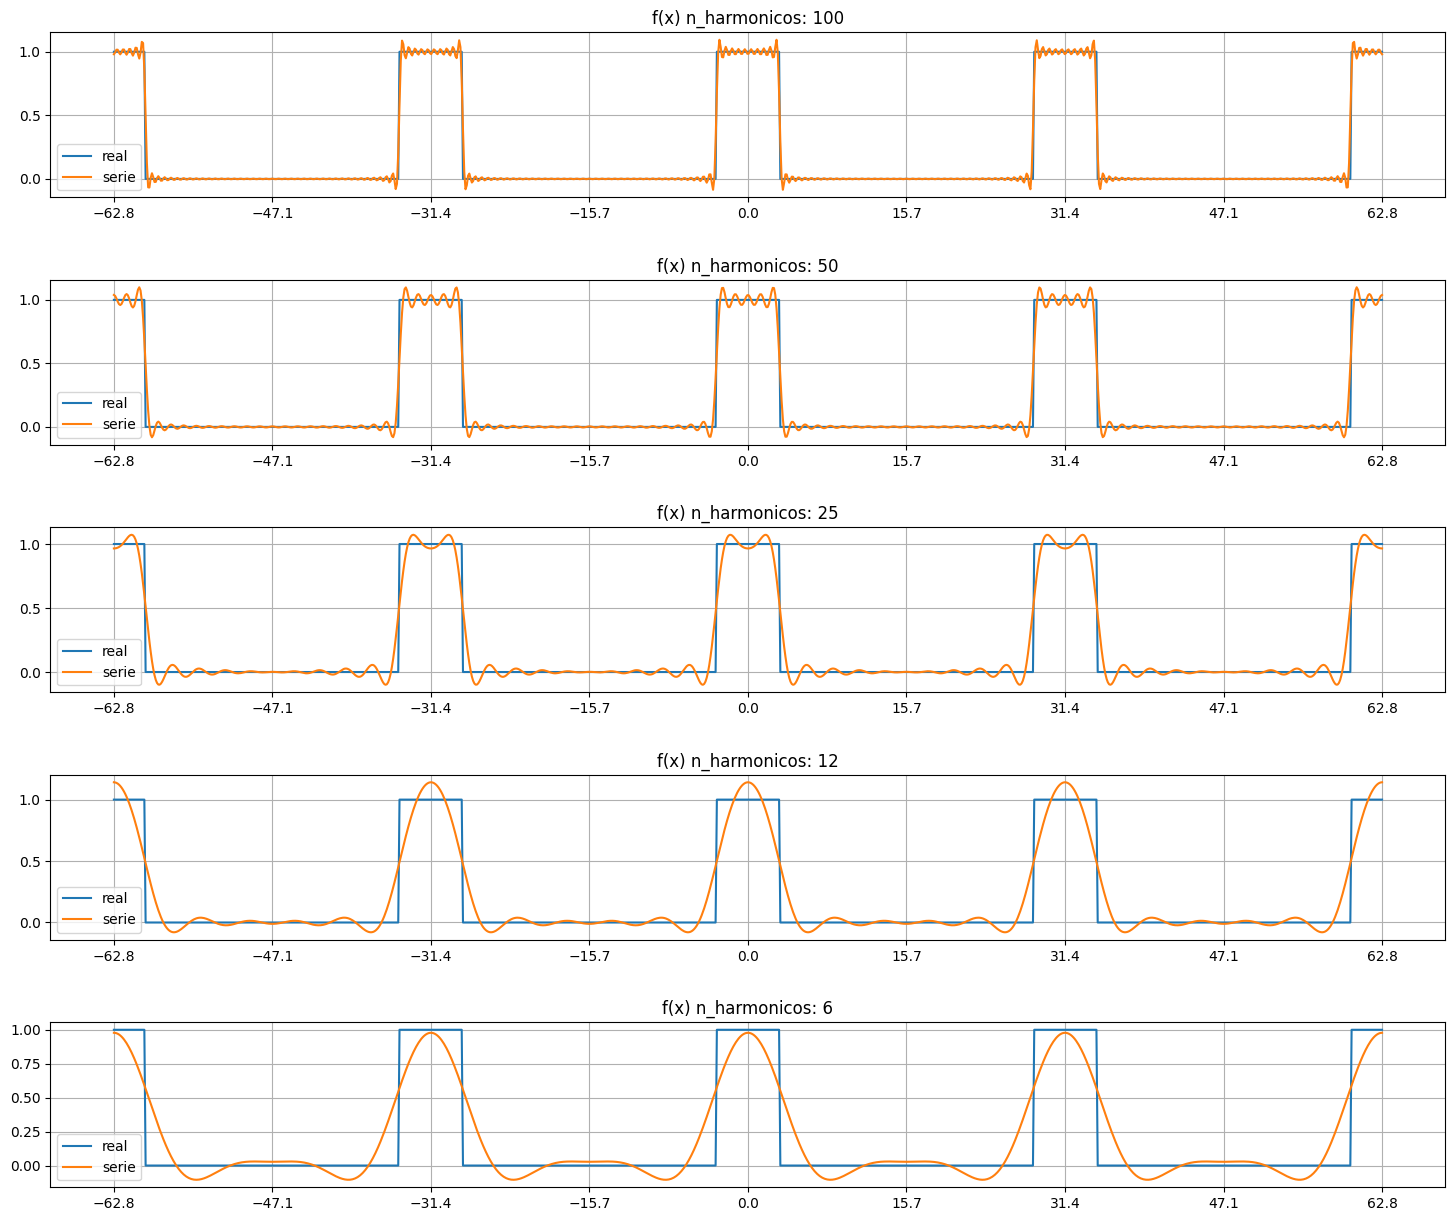

In [122]:
# Numero de periodos
t_len = 4

# Criando um vetor de t
t = np.linspace(-(t_len / 2) * float(t_0), (t_len / 2) * float(t_0), 1000)

# Cria a figura e o plot e ativa o grid
fig, axs = plt.subplots(5, 1, figsize = (18, 15))
fig.subplots_adjust(hspace=0.5)



for i, ax in enumerate(axs):

    # Calculando para o numero de harmonicos
    # Numero de harmonicas
    ks_len = int(100 / (2 ** i))

    # Criando um vetor de harmonicas
    ks = np.arange(-int(ks_len / 2), int(ks_len / 2), 1)

    # Configurando o grafico
    ax.set_title(f'f(x) n_harmonicos: {ks_len}')
    ax.set_xticks(np.arange(-(t_len * float(t_0)), (t_len * float(t_0)), float(t_0) / 2))
    ax.grid()

    # Desenha o grafico da onda real
    ax.plot(t, f(t), label='real')   

    # Cria o grafico da onda estimada pela serie
    ax.plot(t, f_t_new(ks, t), label='serie')

    ax.legend()

# Show the plot
plt.show()

## Desenho do grafico para um numero de harmonicas especifico (item 3)

Esta celula pergunta para o usuario a quantidade de harmonicas que deseja e desenha o grafico para essa quantidade de harmonicas

Observação: Esta celula depende das anteriores, logo é impresindivel executar as celulas anteriores.

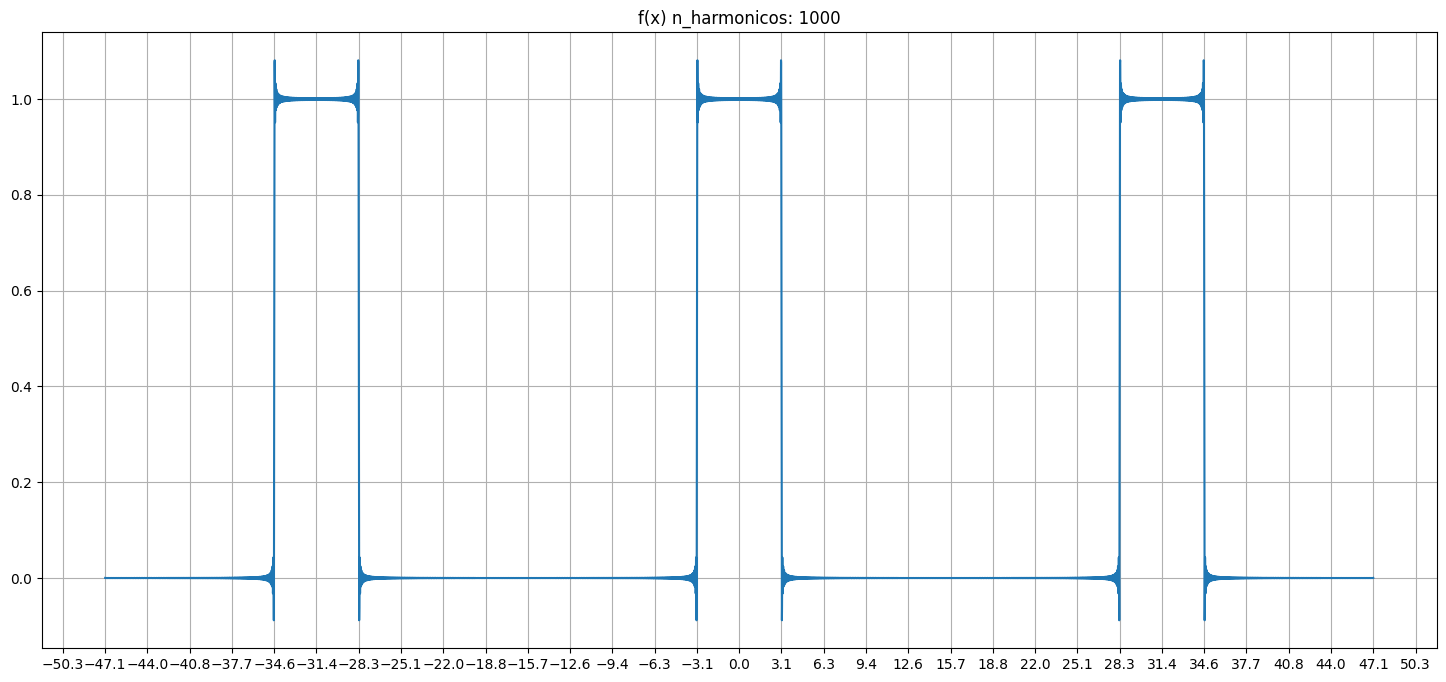

In [123]:
# Numero de periodos
t_len = 3

# Criando um vetor de t
t = np.linspace(-(t_len / 2) * float(t_0), (t_len / 2) * float(t_0), 10000)

fig = plt.figure(figsize = (18, 8))
ax = fig.subplots()
# Numero de harmonicas
ks_len = int(input('Numero de harmonicas'))

# Criando um vetor de harmonicas
ks = np.arange(-int(ks_len / 2), int(ks_len / 2), 1)

ax.set_title(f'f(x) n_harmonicos: {ks_len}')
ax.set_xticks(np.arange(-(t_len * float(t_0)), (t_len * float(t_0)), float(t_0) / 10))

# Cria o grafico da onda estimada pela serie
ax.plot(t, f_t_new(ks, t), label='serie')
ax.grid()

## Desenho do grafico da magnitude e fase dos coeficientes

Para representar a magnitude e fase dos coeficientes da serie foi utilizada a função ck(k) onde no eixo X são os valores de k (as harmonicas k são inteiras) e no eixo Y do grafico 1 é representado |Ck(k)| e no grafico 2 o angulo de Ck(k)

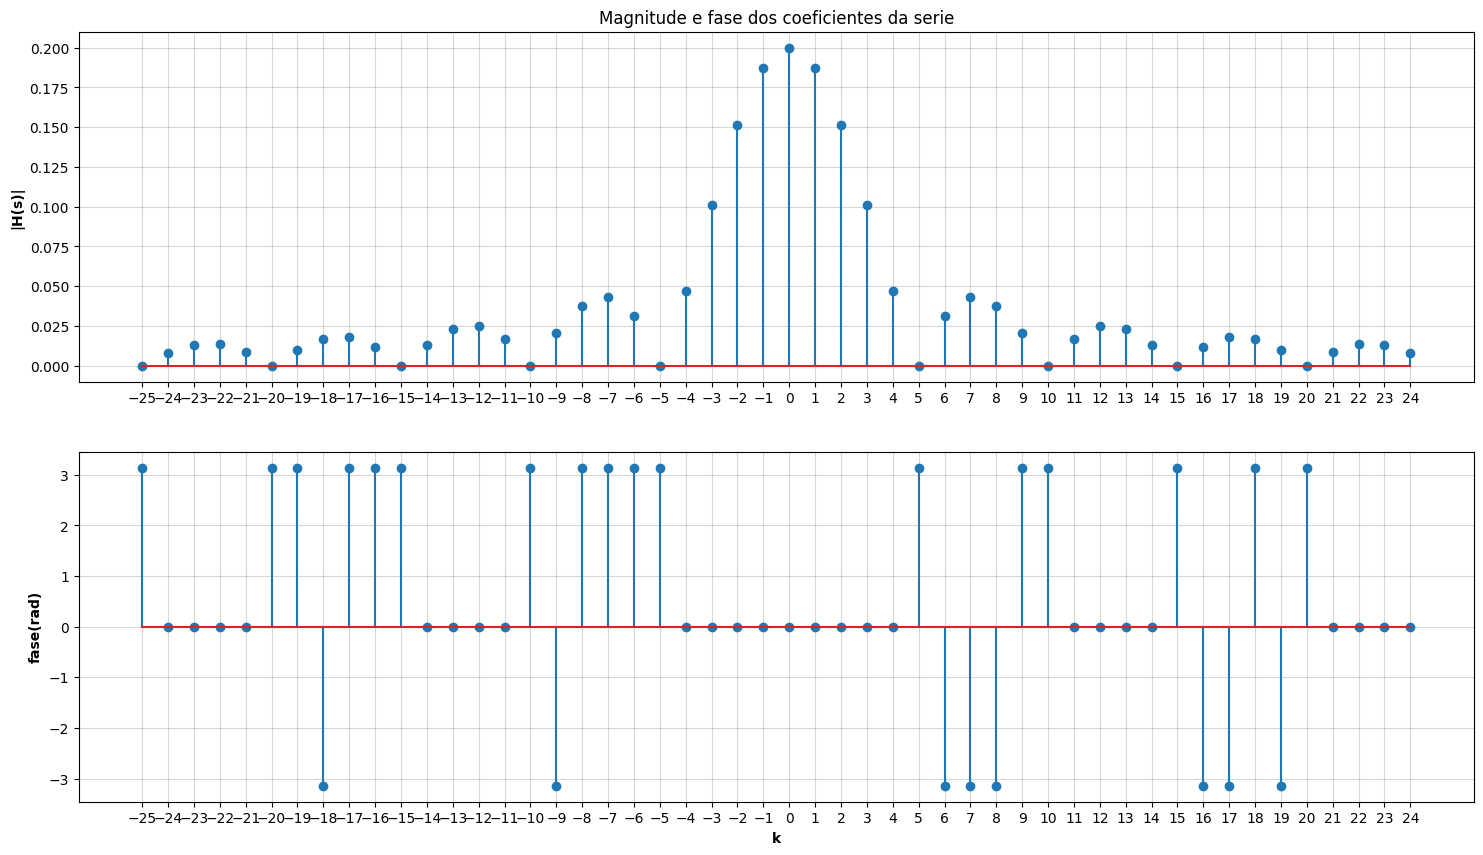

In [124]:
# Converte a equação que define os coeficientes da serie de fourier para uma função ck(k)
ck_k = sym.lambdify(k, ck)

# Numero de harmonicas
ks_len = 50

# Criando um vetor de harmonicas
ks = np.arange(-ks_len / 2, ks_len / 2, 1)

fig = plt.figure(figsize=(18, 10))
(ax, ax2) = fig.subplots(2, 1)
ax.set_title("Magnitude e fase dos coeficientes da serie")

# Grafico da magnitude dos coeficientes
ax.stem(ks, np.abs(ck_k(ks)), label = '|Ck|')
ax.grid(alpha = 0.5)
ax.set_ylabel("|H(s)|", weight = "bold")
ax.set_xticks(ks)

# Grafico da fase dos coeficientes
#ax2 = ax.twinx()
ax2.stem(ks, np.angle(ck_k(ks)), label = 'Ck_fase')
ax2.set_ylabel("fase(rad)", weight = "bold")
ax2.set_xlabel("k", weight = "bold")
ax2.set_xticks(ks)
ax2.grid(alpha = 0.5)


## Analise

Quanto ao espaçamento das componentes no eixo de frequência, quanto maior o período fundamental de um sinal, menor será o espaçamento entre as componentes no domínio da frequência. Isso ocorre porque a frequência fundamental é inversamente proporcional ao período fundamental. Portanto, se o período fundamental aumenta, a frequência fundamental diminui e, consequentemente, as componentes no eixo de frequência ficam mais espaçadas.


Em relação ao erro de aproximação pela série de Fourier devido às descontinuidades do sinal, é importante mencionar que a série de Fourier é mais adequada para sinais contínuos e suaves. Quando um sinal apresenta descontinuidades, como é o caso do sinal $t=k * \frac{pi}{2}$, a série de Fourier pode apresentar dificuldades em aproximar corretamente o sinal nessas regiões de descontinuidade. Isso ocorre porque a série de Fourier é baseada em funções senoidais contínuas, enquanto as descontinuidades introduzem componentes de alta frequência que podem não ser capturadas adequadamente pela série, por isso ao aumentar o numero de harmonicas o sinal recriado condiz mais com o real. 
Alem disso é notavel que mesmo aumentando muito o numero de harmonicas sempre tem um pequeno *overshoot* nas descontinuidades isto se deve ao fenomeno de Gibbs que diz que existem oscilações próximas às regiões de descontinuidade, onde a magnitude dessas oscilações não diminui mesmo quando se adicionam mais harmônicas à aproximação.

# Verificando a função 2

**Figura P6.1-5(a)**

<img src="assets/f2.png">

A função tem um periodo de $\pi$ e em esse periodo é descrita por 

$$
f_{saw}(x) = \\
  \begin{cases} \\
    \frac{x}{2} & \quad \text{if }  0 <= x <= \frac{\pi}{4} \\
    \frac{-x}{2} & \quad \text{ if }  \frac{3\pi}{4} <= x <= \frac{4\pi}{4} \\
    \text{0, } & \quad \text{ otherwise} \\
  \end{cases}
$$

**Representação a função usando pulsos unitarios:**

$$
f_{saw}(x) = 
  \sum_{k = -\infty}^{\infty} 
    \frac{x - \pi k}{2} * 
      (u(t - \pi k) - 
      u(t - (\pi k + \frac{\pi}{4}))) +
    \frac{x - \pi k}{2} * 
      (u(t - (\pi k + \frac{3\pi}{4})) - 
      u(t - (\pi k + \frac{4\pi}{4})))       
$$


## Descrição em codigo da função

In [125]:
def f_aux(x, k):
    period = k * np.pi
    return (((x - period) / 2) * \
            (np.heaviside(x - period, 1) - np.heaviside(x - (period + (np.pi / 4)), 1))) + \
            ((x - (period + np.pi)) / 2) * \
            (np.heaviside(x - (period + (3 * np.pi / 4)), 1) - np.heaviside(x - (period + np.pi), 1))

def f(x):
    return [np.sum([ f_aux(d, k) for k in range(int(x.min() / 2) - 2, int(x.max() / 2) + 2) ]) for d in x ]

## Desenho do grafico da função

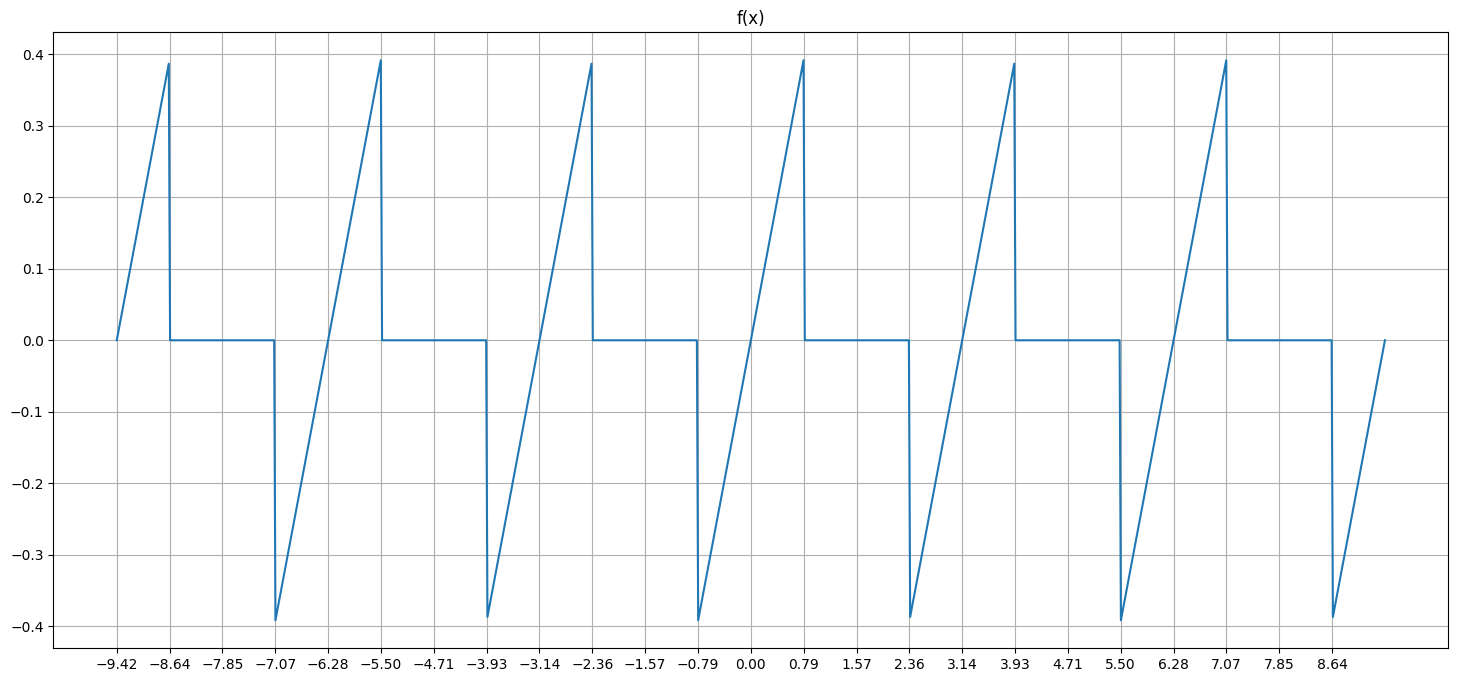

In [126]:
x = np.linspace(-3 * np.pi, 3 * np.pi, 1000)
y = f(x)

fig = plt.figure(figsize = (18, 8))
ax = fig.add_subplot()
ax.grid()
ax.plot(x, y)


# Configurando o grafico

ax.set_title(f'f(x)')
ax.set_xticks(np.arange(x.min(), x.max(), np.pi / 4))
ax.grid(visible=True)


## Calculando os coeficientes da serie de fourier (Item 1)

Os coeficientes da serie de fourier podem ser calculados por:

$$ck(k) = \frac{1}{T_0} \int_{T_0} f(x)e^{-j w_0 t}dt$$

Como a função tem partes, ela pode ser desrita pelo somatorio das integrais

$$
ck(k) = \frac{1}{T_0} \int_{0}^{\frac{\pi}{4}} x e^{-j w_0 t}dt +
\frac{1}{T_0} \int_{\frac{\pi}{4}}^{\frac{3\pi}{4}} 0 * e^{-j w_0 t}dt +
\frac{1}{T_0} \int_{\frac{3\pi}{4}}^{\pi} (x - \frac{3\pi}{4}) e^{-j w_0 t}dt
$$

Resolvendo a integral:

$$\begin{cases} \frac{\left(\left(i \pi k - 2\right) e^{2 i \pi k} + \left(i \pi k - 2 e^{\frac{i \pi k}{2}} + 2\right) e^{3 i \pi k} + 2 e^{\frac{3 i \pi k}{2}}\right) e^{- \frac{7 i \pi k}{2}}}{16 \pi k^{2}} & \text{for}\: \left(k > -\infty \vee k > 0\right) \wedge \left(k > -\infty \vee k < \infty\right) \wedge \left(k > 0 \vee k < 0\right) \wedge \left(k < 0 \vee k < \infty\right) \\0 & \text{otherwise} \end{cases}$$

In [127]:
# Periodo
t_0 = sym.pi
# Frequencia
f_0 = 1 / t_0
# Frequencia angular
w_0 = 2 * sym.pi * f_0

# Definindo a variavel independente
t = sym.Symbol('t')
# Definindo o periodo
k = sym.Symbol('k')

# Calculando a equação que define os coeficientes da serie de fourier para a função
ck = f_0 * sym.integrate((t / 2) * sym.exp(-sym.I * k * w_0 * t), (t, 0, sym.pi / 4 )) + \
    f_0 * sym.integrate(0 * sym.exp(-sym.I * k * w_0 * t), (t, sym.pi / 4, 3 * sym.pi / 4)) + \
    f_0 * sym.integrate(((t - sym.pi) / 2) * sym.exp(-sym.I * k * w_0 * t), (t, 3 * sym.pi / 4 , sym.pi))

print("Coeficientes da serie de fourier:")
display(sym.simplify(ck))

print(sym.latex(sym.simplify(ck)))

Coeficientes da serie de fourier:


Piecewise((((I*pi*k - 2)*exp(2*I*pi*k) + (I*pi*k - 2*exp(I*pi*k/2) + 2)*exp(3*I*pi*k) + 2*exp(3*I*pi*k/2))*exp(-7*I*pi*k/2)/(16*pi*k**2), ((k > -oo) | (k > 0)) & ((k > -oo) | (k < oo)) & ((k > 0) | (k < 0)) & ((k < 0) | (k < oo))), (0, True))

\begin{cases} \frac{\left(\left(i \pi k - 2\right) e^{2 i \pi k} + \left(i \pi k - 2 e^{\frac{i \pi k}{2}} + 2\right) e^{3 i \pi k} + 2 e^{\frac{3 i \pi k}{2}}\right) e^{- \frac{7 i \pi k}{2}}}{16 \pi k^{2}} & \text{for}\: \left(k > -\infty \vee k > 0\right) \wedge \left(k > -\infty \vee k < \infty\right) \wedge \left(k > 0 \vee k < 0\right) \wedge \left(k < 0 \vee k < \infty\right) \\0 & \text{otherwise} \end{cases}


## Recriando o sinal a partir da serie de fourier (item 2)


### Calculo do sinal recriado pela serie de fourier

Para recriar a função são criadas ks_len harmonicas para cada t usando a função

$$ 
f_{new} =
\sum_{k = -\infty}^{\infty}
c_k(k) * e^{k j w_0 t}
$$

Para isso é criado uma função que recebe um vetor de harmonicas e de tempo e calcula a somatoria descrita acima para cada t do vetor de tempo

In [128]:
def f_t_new(ks, t):
    # Converte a equação que define os coeficientes da serie de fourier para uma função ck(k)
    ck_k = sym.lambdify(k, ck)
    # Criando matriz de t com tamanho k para calcular a somatoria
    t_m = np.tile(t, (len(ks), 1))

    # Recriando a função de t a partir da serie de fourier
    return np.sum(np.transpose(ck_k(ks))[:, np.newaxis] * np.exp(1j * np.transpose(ks)[:, np.newaxis] * float(w_0) * t_m), axis=0)


### Grafico do sinal recriado pela serie de fourier

É desenhado o grafico da função reconstruida e a função original para diferentes numeros de harmonicas (k)

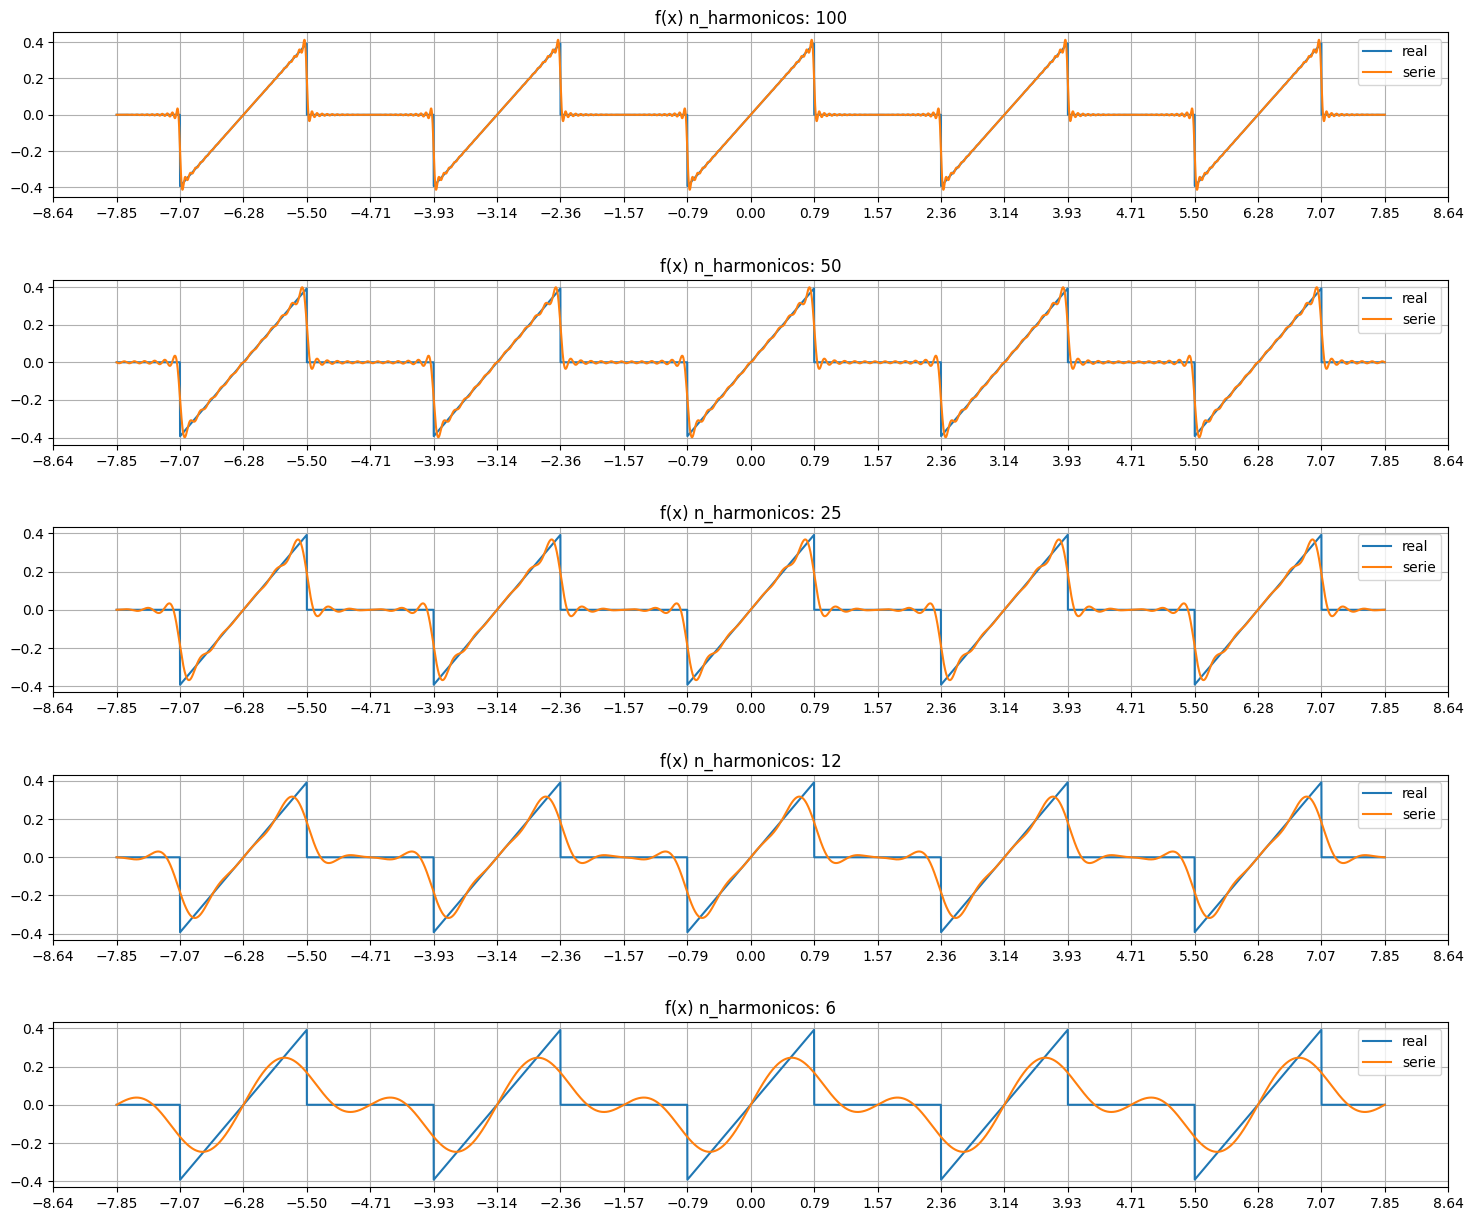

In [129]:
# Numero de periodos
t_len = 5

# Criando um vetor de t
t = np.linspace(-(t_len / 2) * float(t_0), (t_len / 2) * float(t_0), 7000)

# Cria a figura e o plot e ativa o grid
fig, axs = plt.subplots(5, 1, figsize = (18, 15))
fig.subplots_adjust(hspace=0.5)



for i, ax in enumerate(axs):

    # Calculando para o numero de harmonicos
    # Numero de harmonicas
    ks_len = int(100 / (2 ** i))

    # Criando um vetor de harmonicas
    ks = np.arange(-int(ks_len / 2), int(ks_len / 2), 1)

    # Configurando o grafico
    ax.set_title(f'f(x) n_harmonicos: {ks_len}')
    ax.set_xticks(np.arange(-(t_len * float(t_0)), (t_len * float(t_0)), float(t_0) / 4))
    ax.grid()

    # Desenha o grafico da onda real
    ax.plot(t, f(t), label='real')   

    # Cria o grafico da onda estimada pela serie
    ax.plot(t, f_t_new(ks, t), label='serie')

    ax.legend()

# Show the plot
plt.show()

## Desenho do grafico para um numero especifico de harmonicas  (item 3)

Esta celula pergunta para o usuario a quantidade de harmonicas que deseja e desenha o grafico para essa quantidade de harmonicas

Observação: Esta celula depende das anteriores, logo é impresindivel executar as celulas anteriores.

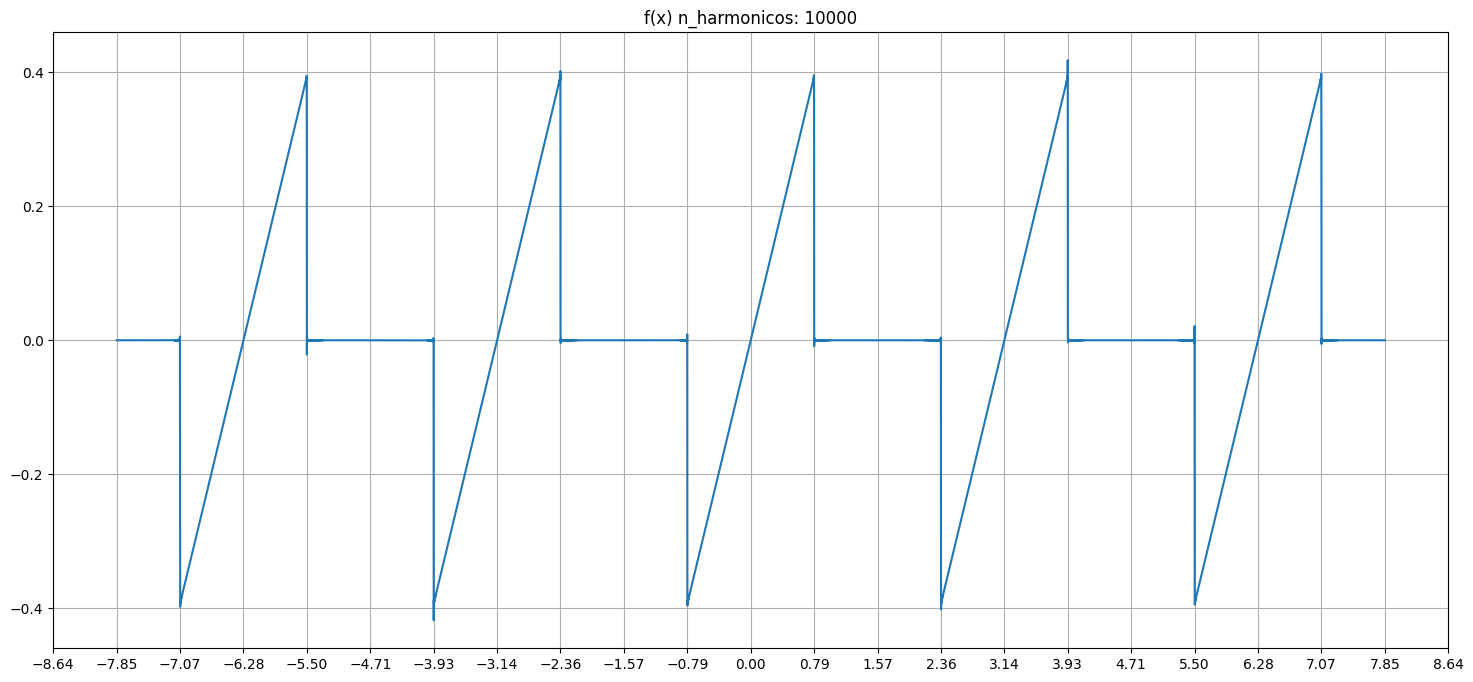

In [102]:
# Numero de periodos
t_len = 5

# Criando um vetor de t
t = np.linspace(-(t_len / 2) * float(t_0), (t_len / 2) * float(t_0), 10000)

fig = plt.figure(figsize = (18, 8))
ax = fig.subplots()
# Numero de harmonicas
ks_len = int(input('Numero de harmonicas'))

# Criando um vetor de harmonicas
ks = np.arange(-int(ks_len / 2), int(ks_len / 2), 1)

ax.set_title(f'f(x) n_harmonicos: {ks_len}')
ax.set_xticks(np.arange(-(t_len * float(t_0)), (t_len * float(t_0)), float(t_0) / 4))

# Cria o grafico da onda estimada pela serie
ax.plot(t, f_t_new(ks, t), label='serie')
ax.grid()

## Desenho do grafico da magnitude e fase dos coeficientes

Para representar a magnitude e fase dos coeficientes da serie foi utilizada a função ck(k) onde no eixo X são os valores de k (as harmonicas k são inteiras) e no eixo Y do grafico 1 é representado |Ck(k)| e no grafico 2 o angulo de Ck(k)

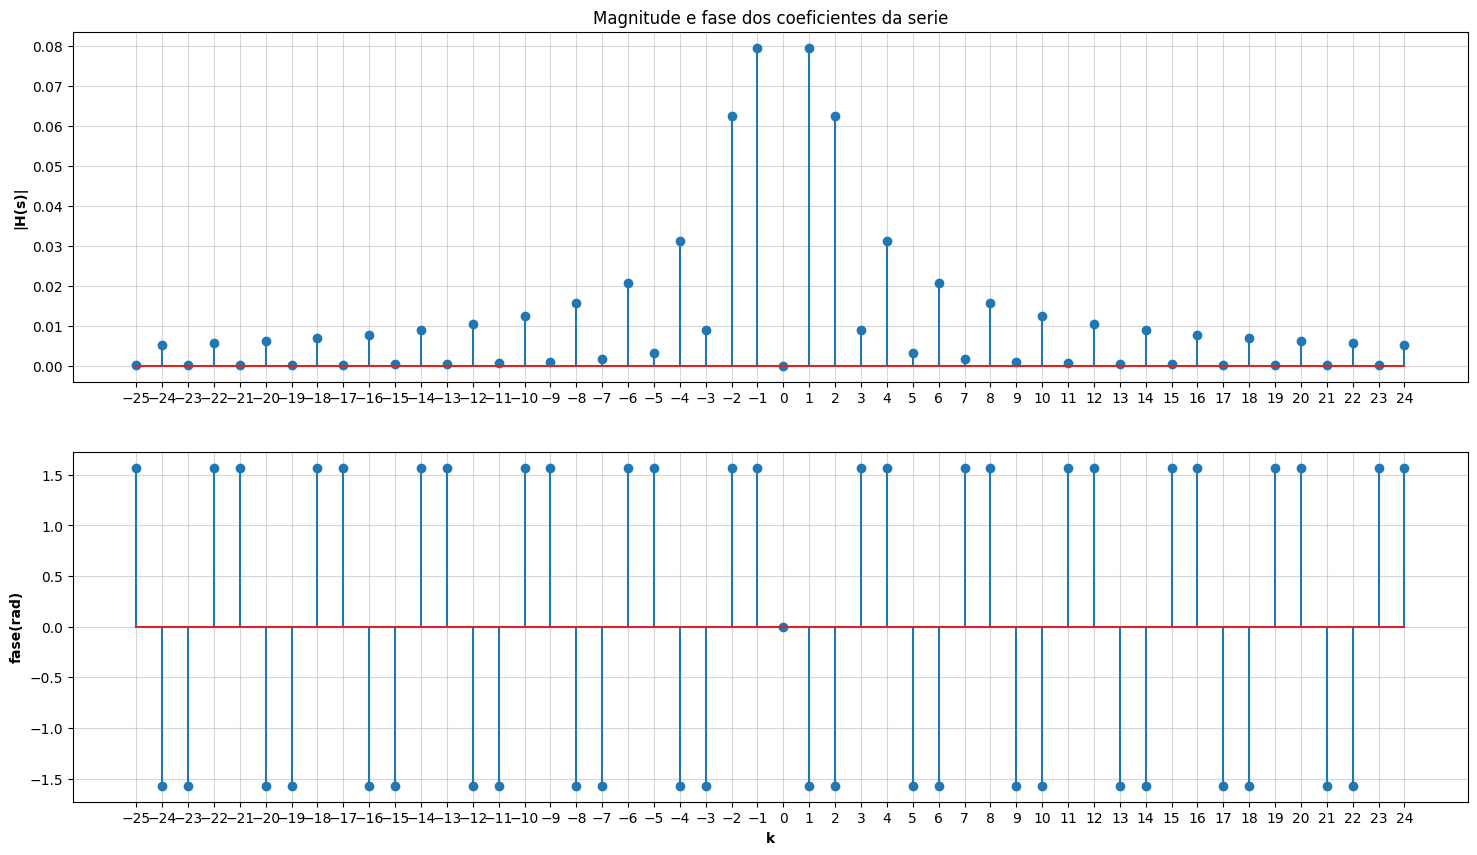

In [103]:
# Converte a equação que define os coeficientes da serie de fourier para uma função ck(k)
ck_k = sym.lambdify(k, ck)

# Numero de harmonicas
ks_len = 50

# Criando um vetor de harmonicas
ks = np.arange(-ks_len / 2, ks_len / 2, 1)

fig = plt.figure(figsize=(18, 10))
ax, ax2 = fig.subplots(2, 1)
ax.set_title("Magnitude e fase dos coeficientes da serie")

# Grafico da magnitude dos coeficientes
ax.stem(ks, np.abs(ck_k(ks)), label = '|Ck|')
ax.set_ylabel("|H(s)|", weight = "bold")
ax.set_xticks(ks)
ax.grid(alpha = 0.5)

# Grafico da fase dos coeficientes
ax2.stem(ks, np.angle(ck_k(ks)), label = 'Ck_fase')
ax2.set_ylabel("fase(rad)", weight = "bold")
ax2.set_xlabel("k", weight = "bold")
ax2.set_xticks(ks)
ax2.grid(alpha = 0.5)



# Analise das funções

Quanto ao espaçamento das componentes no eixo de frequência, quanto maior o período fundamental de um sinal, menor será o espaçamento entre as componentes no domínio da frequência. Isso ocorre porque a frequência fundamental é inversamente proporcional ao período fundamental. Portanto, se o período fundamental aumenta, a frequência fundamental diminui e, consequentemente, as componentes no eixo de frequência ficam mais espaçadas. Isto pode ser comparado nas duas funções, onde na função 1 o espaçamento é $10\pi$ e na função 2 o espaçamento é de $\pi$

O sinal 2 tem simetria impar é isso fica evidente nos coeficientes da serie, onde a fase de todas as harmonicas diferentes de 0 são $\frac{pi}{2}$ isto quer dizer que todas as componentes são iguais a 0

Em relação ao erro de aproximação pela série de Fourier devido às descontinuidades do sinal, é importante mencionar que a série de Fourier é mais adequada para sinais contínuos e suaves. Quando um sinal apresenta descontinuidades, como é o caso do sinal , a série de Fourier pode apresentar dificuldades em aproximar corretamente o sinal nessas regiões de descontinuidade. Isso ocorre porque a série de Fourier é baseada em funções senoidais contínuas, enquanto as descontinuidades introduzem componentes de alta frequência que podem não ser capturadas adequadamente pela série, por isso ao aumentar o numero de harmonicas o sinal recriado condiz mais com o real. 
Alem disso é notavel que mesmo aumentando muito o numero de harmonicas sempre tem um pequeno *overshoot* nas descontinuidades isto se deve ao fenomeno de Gibbs que diz que existem oscilações próximas às regiões de descontinuidade, onde a magnitude dessas oscilações não diminui mesmo quando se adicionam mais harmônicas à aproximação.



